# Clustering k-means

In [1]:
from scipy.io import arff

f = open('data/diamond9.arff', 'r')
data, meta = arff.loadarff(f)

print(data[0])
print(data['x'])
print(data['class'])
#print(meta)

(-1.98666, -0.00228882, b'0')
[-1.98666 -1.95108 -1.92679 ...  3.84756  3.89923  3.93759]
[b'0' b'0' b'0' ... b'8' b'8' b'8']


In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple']

c_used = [colors[int(data[i]['class'])] for i in range(len(data))]

plt.scatter(data['x'], data['y'], c=c_used, s=10)

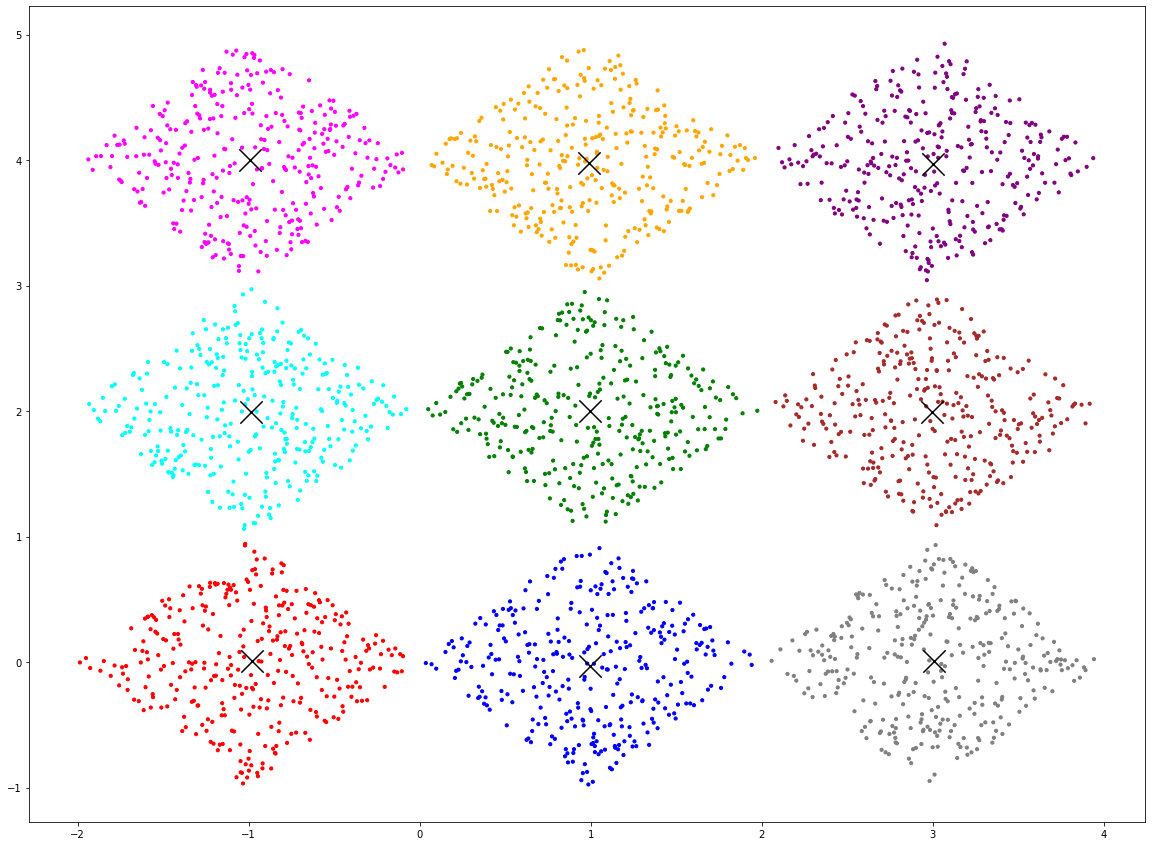

In [3]:
from sklearn.cluster import KMeans

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

kmeans = KMeans(n_clusters=9, random_state=0).fit(X)

#kmeans.labels_
#print(max(kmeans.labels_)) # 8 OK

#print(kmeans.cluster_centers_)

plt.figure(figsize=(20,15))

plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            c='black', s=500, marker='x')

In [4]:
data[0]
data[1]


(-1.95108, 0.0324707, b'0')

In [5]:
kmeans.predict([[1, 0.0]])

array([8], dtype=int32)

In [6]:
from sklearn import metrics

labels_true = [int(data[i]['class']) for i in range(len(data))]

metrics.adjusted_rand_score(labels_true, kmeans.labels_)

1.0

In [7]:
import time

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []

for k in range(2, 20):
    start_time = time.process_time()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    times.append(time.process_time() - start_time)
    
    values_silhouette.append(
        metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
    )

    values_calinski.append(
        metrics.calinski_harabasz_score(X, kmeans.labels_)
    )
    values_bouldin.append(
        metrics.davies_bouldin_score(X, kmeans.labels_)
    )

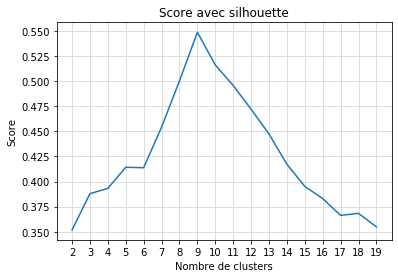

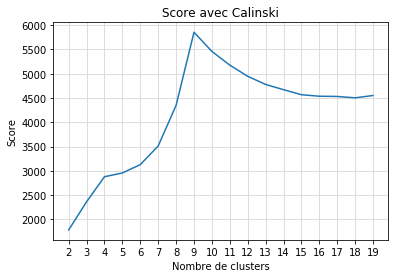

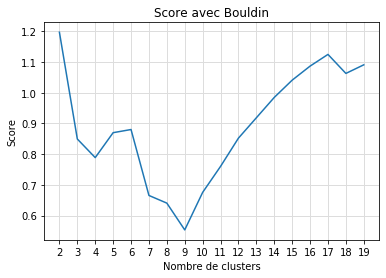

In [8]:
plt.title('Score avec silhouette')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_silhouette)
plt.show()

plt.title('Score avec Calinski')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_calinski)
plt.show()

plt.title('Score avec Bouldin')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_bouldin)
plt.show()

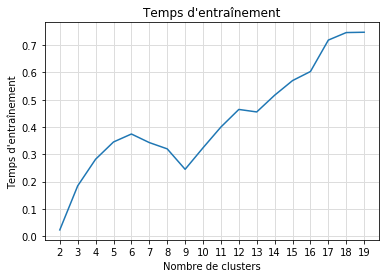

In [9]:
plt.title('Temps d\'entraînement')
plt.xlabel('Nombre de clusters')
plt.ylabel('Temps d\'entraînement')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), times)
plt.show()

## Expérimentations avec d'autres formes

### Convexe / non séparés

In [10]:
from scipy.io import arff

f = open('data/elly.arff', 'r')
data, meta = arff.loadarff(f)

print(data[0])
print(data['x'])
print(data['class'])
#print(meta)

(-0.585835, -0.401656, b'0')
[-0.585835 -1.13392  -0.898172 ... -2.29554  -2.09697  -0.208412]
[b'0' b'0' b'0' ... b'9' b'9' b'9']


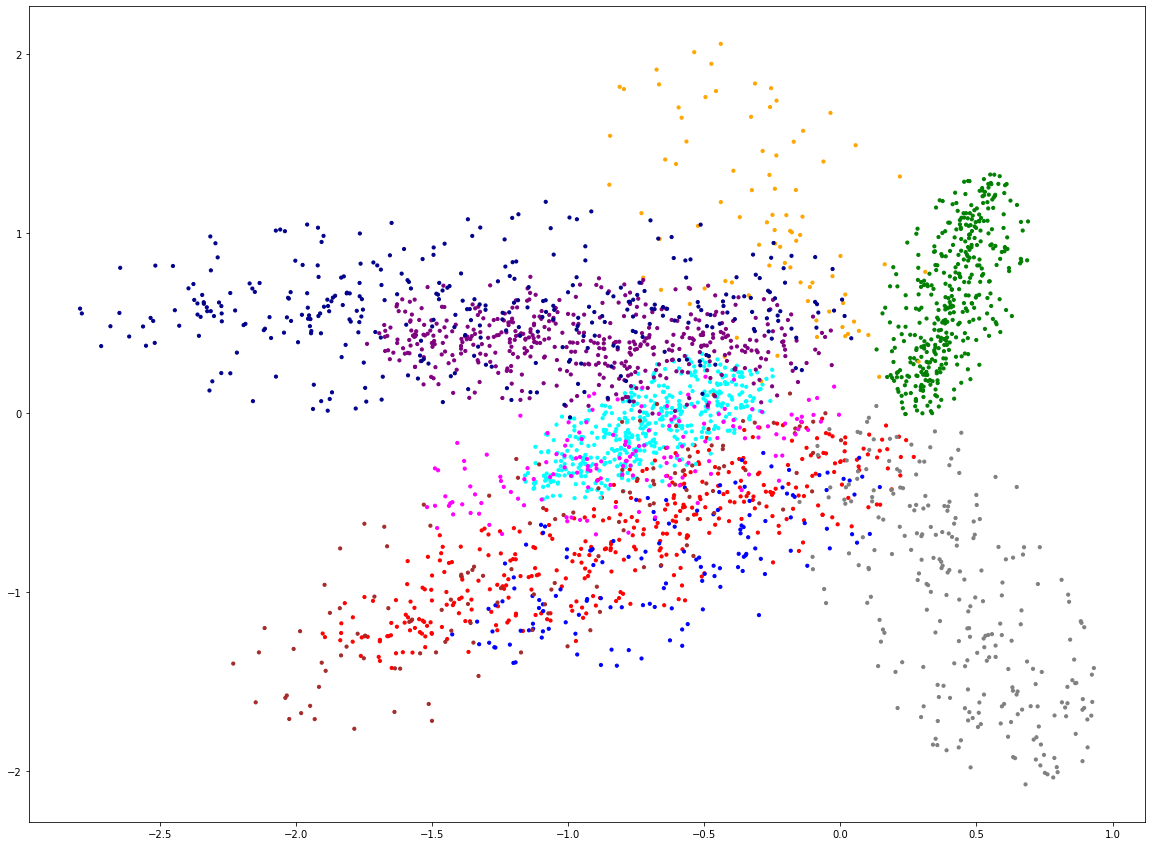

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple', 'darkblue']

c_used = [colors[int(data[i]['class'])] for i in range(len(data))]

plt.scatter(data['x'], data['y'], c=c_used, s=10)

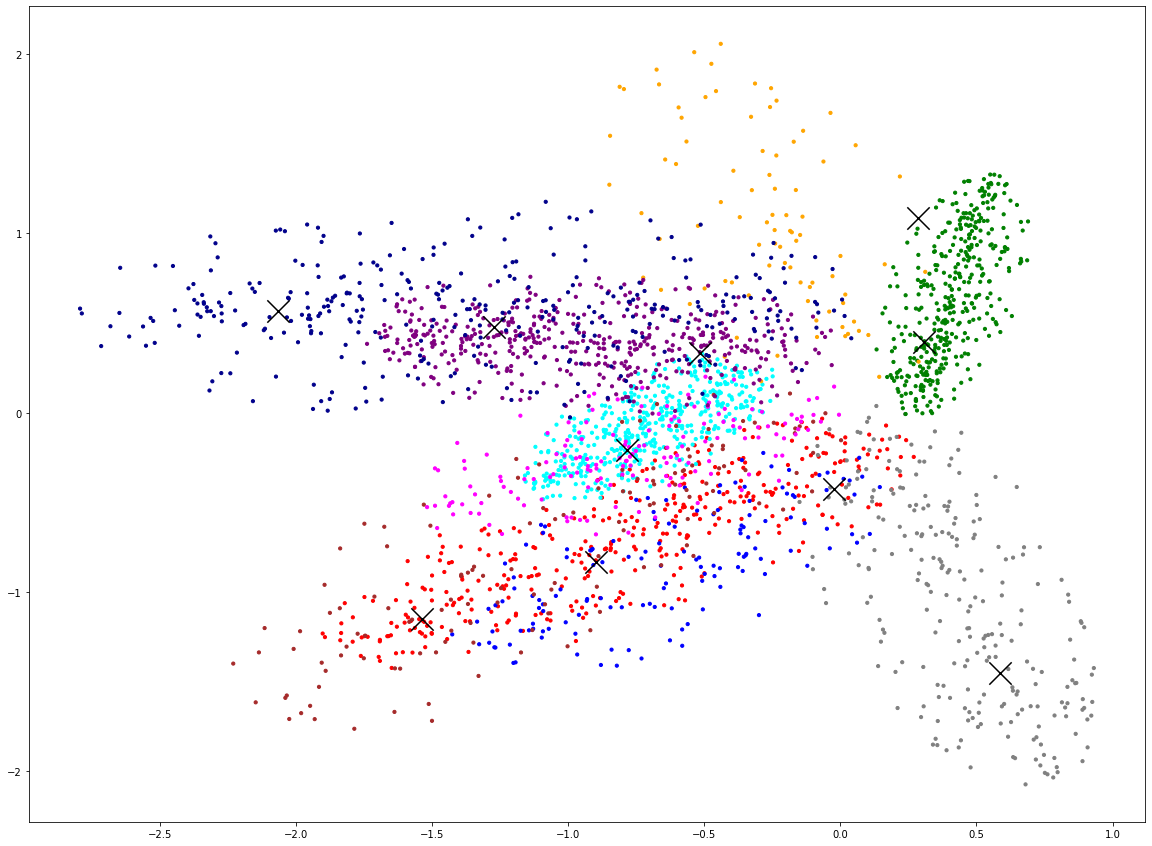

In [12]:
from sklearn.cluster import KMeans

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

#kmeans.labels_
#print(max(kmeans.labels_)) # 8 OK

#print(kmeans.cluster_centers_)

plt.figure(figsize=(20,15))

plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            c='black', s=500, marker='x')

In [13]:
kmeans.predict([[1, 0.0]])

array([6], dtype=int32)

In [14]:
from sklearn import metrics

labels_true = [int(data[i]['class']) for i in range(len(data))]

metrics.adjusted_rand_score(labels_true, kmeans.labels_)

0.37091463660675844

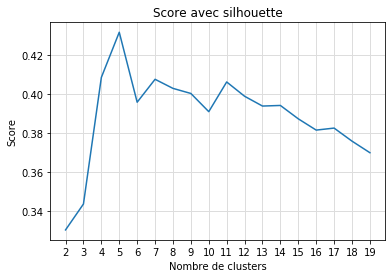

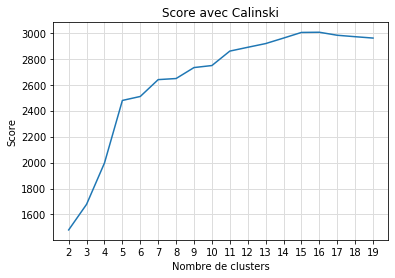

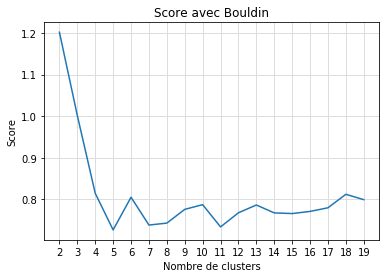

In [15]:
import time

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []

for k in range(2, 20):
    start_time = time.process_time()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    times.append(time.process_time() - start_time)
    
    values_silhouette.append(
        metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
    )

    values_calinski.append(
        metrics.calinski_harabasz_score(X, kmeans.labels_)
    )
    values_bouldin.append(
        metrics.davies_bouldin_score(X, kmeans.labels_)
    )
    
    
plt.title('Score avec silhouette')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_silhouette)
plt.show()

plt.title('Score avec Calinski')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_calinski)
plt.show()

plt.title('Score avec Bouldin')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_bouldin)
plt.show()

### Convexe / bien séparés / densités non similaires / bruité

In [16]:
from scipy.io import arff

f = open('data/CURE.arff', 'r')
data, meta = arff.loadarff(f)

print(data[0])
print(data['x'])
print(data['class'])
#print(meta)

(-0.590353, -0.566736, b'0')
[-0.590353  -0.147896   0.0554175 ...  0.4134     0.942855  -0.174301 ]
[b'0' b'0' b'0' ... b'noise' b'noise' b'noise']


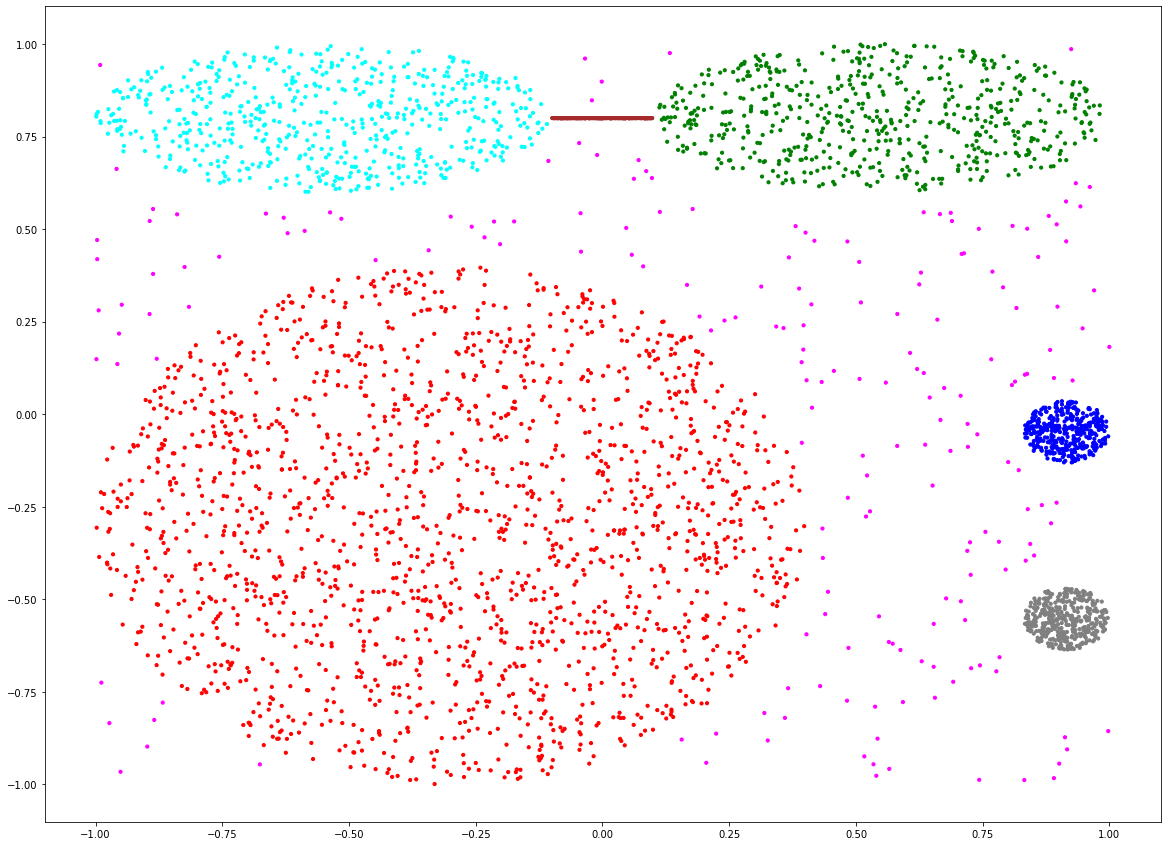

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta']

c_used = [colors[6 if data[i]['class'].decode("utf-8") == 'noise' else int(data[i]['class'])] for i in range(len(data))]

plt.scatter(data['x'], data['y'], c=c_used, s=10)

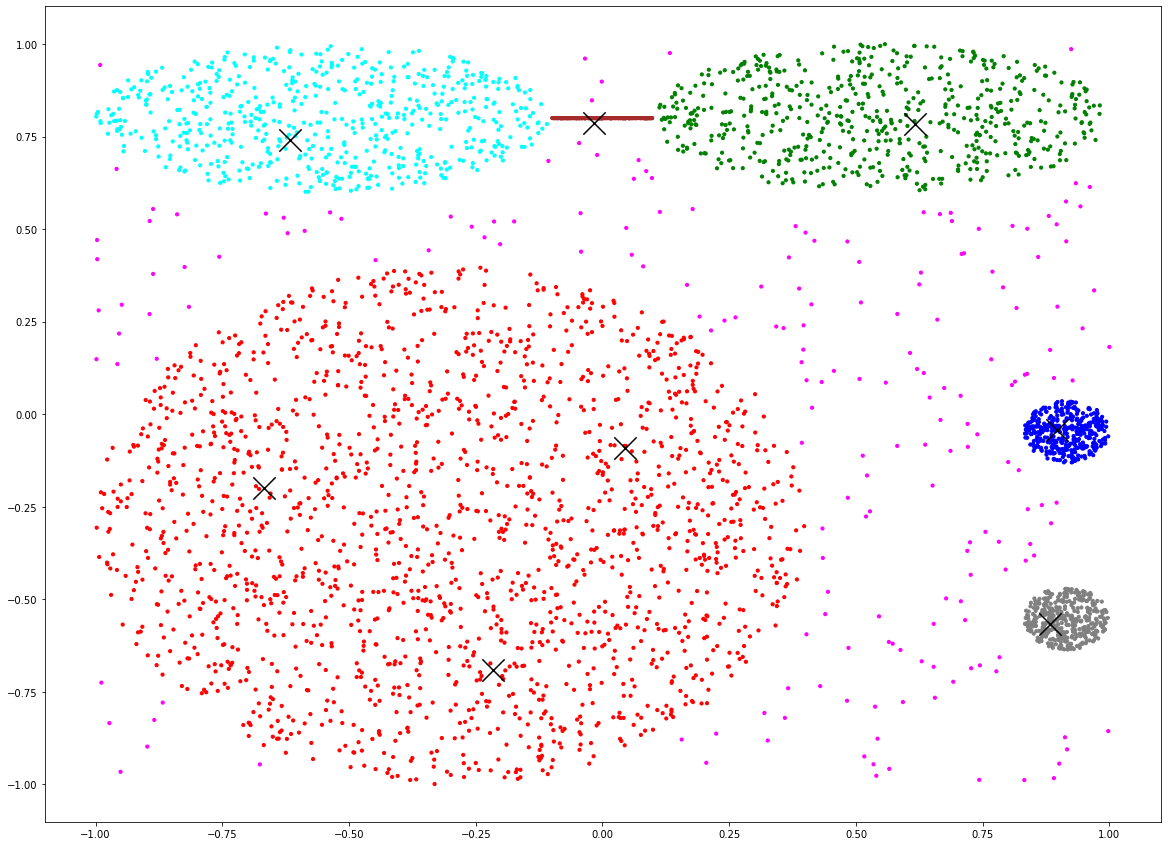

In [18]:
from sklearn.cluster import KMeans

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

kmeans = KMeans(n_clusters=8, random_state=0).fit(X)

#kmeans.labels_
#print(max(kmeans.labels_)) # 8 OK

#print(kmeans.cluster_centers_)

plt.figure(figsize=(20,15))

plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            c='black', s=500, marker='x')

In [19]:
kmeans.predict([[1, 0.0]])

array([3], dtype=int32)

In [20]:
from sklearn import metrics

labels_true = [6 if data[i]['class'].decode("utf-8") == 'noise' else int(data[i]['class']) for i in range(len(data))]

metrics.adjusted_rand_score(labels_true, kmeans.labels_)

0.4874787844890488

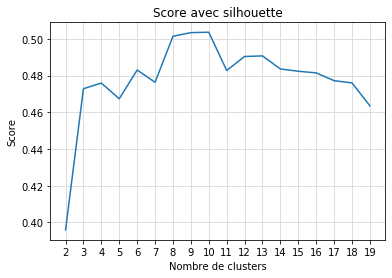

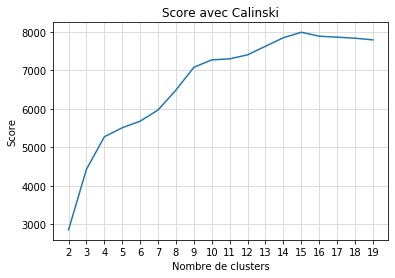

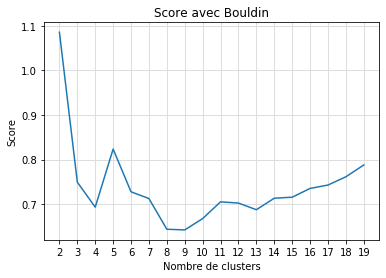

In [21]:
import time

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []

for k in range(2, 20):
    start_time = time.process_time()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    times.append(time.process_time() - start_time)
    
    values_silhouette.append(
        metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
    )

    values_calinski.append(
        metrics.calinski_harabasz_score(X, kmeans.labels_)
    )
    values_bouldin.append(
        metrics.davies_bouldin_score(X, kmeans.labels_)
    )
    
    
plt.title('Score avec silhouette')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_silhouette)
plt.show()

plt.title('Score avec Calinski')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_calinski)
plt.show()

plt.title('Score avec Bouldin')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,20))
plt.plot(range(2,20), values_bouldin)
plt.show()

Penser à tester avec des formes non convexes pour voir si ça influe le résultat. 

# Clustering agglométarif

In [22]:
from scipy.io import arff

# CURE, diamond9, spiral
f = open('data/spiral.arff', 'r')
data, meta = arff.loadarff(f)

print(data[0])
print(data['x'])
print(data['class'])
#print(meta)

(31.95, 7.95, b'3')
[31.95 31.15 30.45 29.7  28.9  28.05 27.2  26.35 25.4  24.6  23.6  22.75
 21.85 20.9  20.   19.1  18.2  17.3  16.55 15.7  14.85 14.15 13.4  12.7
 12.05 11.45 10.9  10.3   9.7   9.35  8.9   8.55  8.15  7.95  7.75  7.55
  7.45  7.35  7.3   7.35  7.35  7.55  7.7   7.8   8.05  8.3   8.65  8.9
  9.3   9.65 10.2  10.6  11.1  11.55 11.95 12.55 13.05 13.45 14.   14.55
 15.1  15.7  16.15 16.7  17.15 17.75 18.2  18.65 19.1  19.6  20.   20.4
 20.7  21.   21.45 21.75 22.   22.25 22.5  22.65 22.75 22.9  23.   23.1
 23.15 23.2  23.2  23.2  23.1  23.05 22.9  22.85 22.7  22.6  22.55 22.4
 22.35 22.2  22.15 22.   21.9  21.85 21.75 21.65 21.55 21.5  19.35 20.35
 21.35 22.25 23.2  23.95 24.9  25.6  26.35 27.15 27.75 28.3  28.95 29.5
 29.95 30.4  30.6  30.9  31.25 31.35 31.5  31.55 31.65 31.6  31.45 31.3
 31.15 30.9  30.6  30.3  29.9  29.5  29.   28.5  28.   27.55 26.9  26.25
 25.7  25.15 24.5  23.9  23.15 22.5  21.9  21.25 20.5  19.9  19.25 18.75
 18.05 17.5  16.9  16.35 15.8  15.4  1

In [23]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import numpy as np

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple']
c_used = [colors[6 if data[i]['class'].decode("utf-8") == 'noise' else int(data[i]['class'])] for i in range(len(data))]

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

agglo = AgglomerativeClustering(n_clusters=9, linkage='ward').fit(X)

plt.figure(figsize=(20,15))


children = agglo.children_

# Distances between each pair of children
# Since we don't have this information, we can use a uniform one for plotting
distance = np.arange(children.shape[0])

# The number of observations contained in each cluster level
no_of_observations = np.arange(2, children.shape[0]+2)

# Create linkage matrix and then plot the dendrogram
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

<Figure size 1440x1080 with 0 Axes>

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [12.5, 12.5, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [130.0, 130.0, 152.5, 152.5],
  [91.25, 91.25, 141.25, 141.25],
  [31.25, 31.25, 116.25, 116.25],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [220.0, 220.0, 242.5, 242.5],
  [190.0, 190.0, 231.25, 231.25],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 330.0],
  [280.0, 280.0, 320.0, 320.0],
  [345.0, 345.0, 355.0, 35

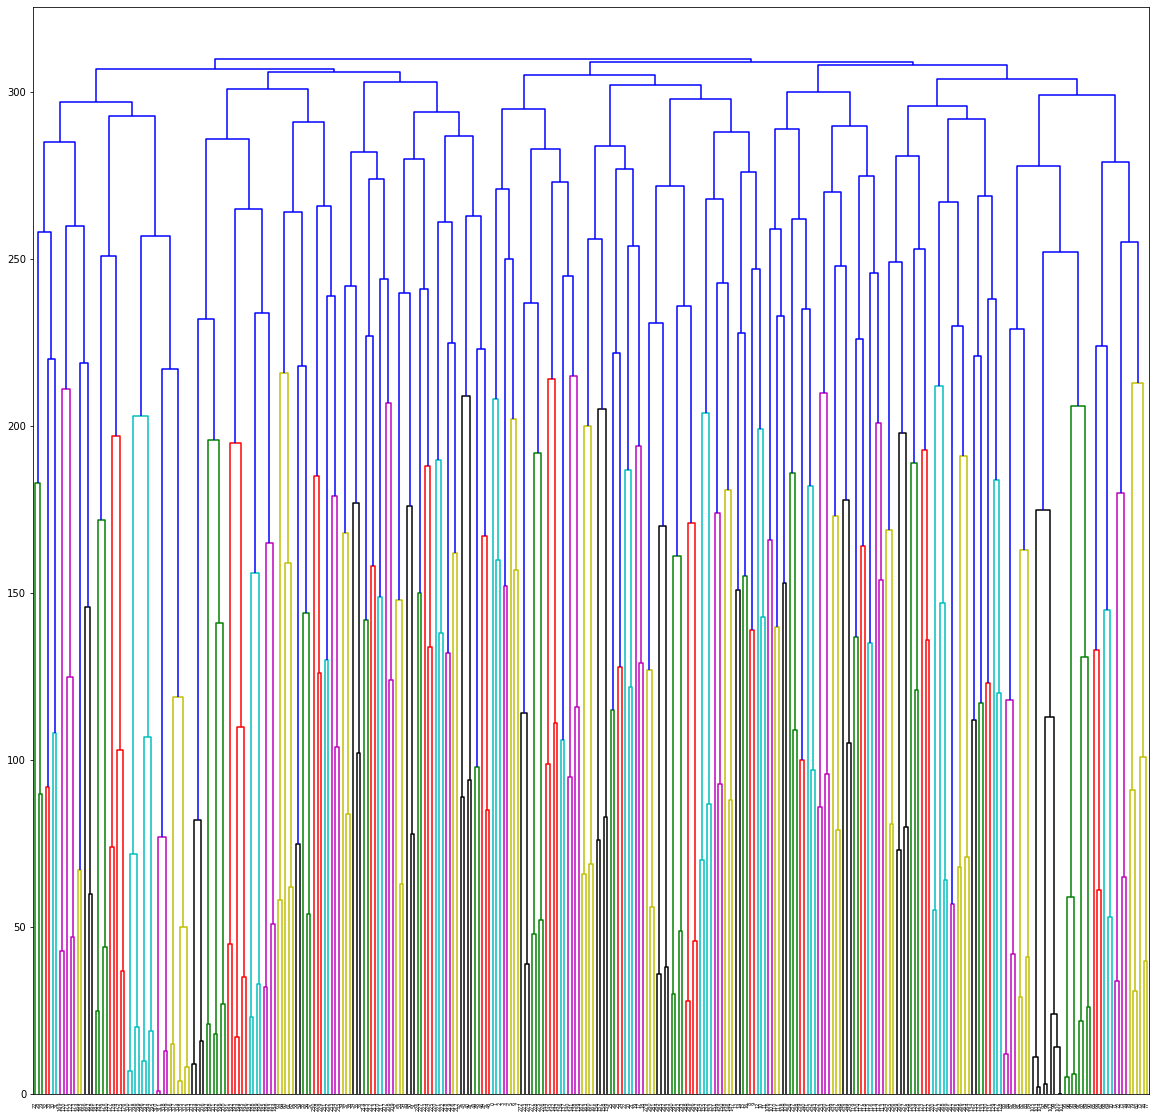

In [24]:
# Plot the corresponding dendrogram
plt.figure(figsize=(20,20))
dendrogram(linkage_matrix)

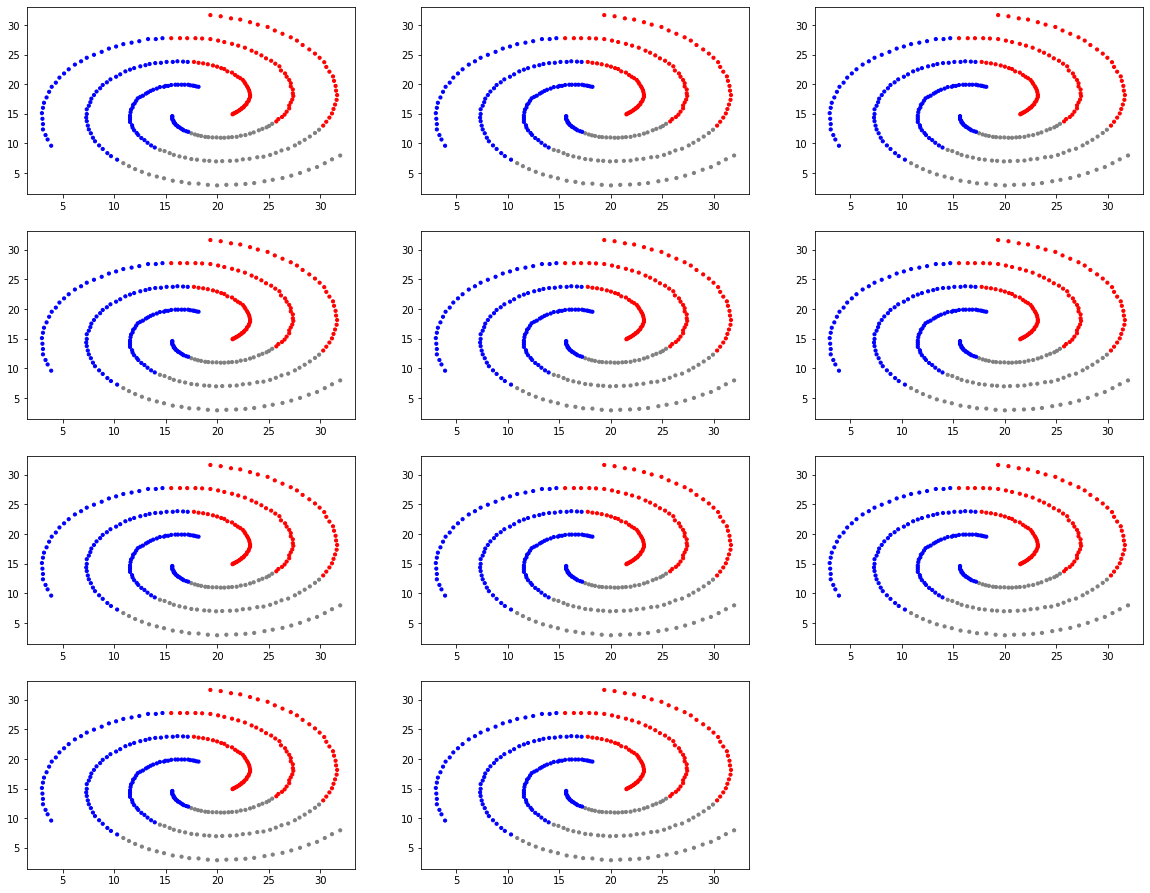

In [25]:
colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(20,20))

for k in range(2, 13):
    agglo = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
    c_used = [colors[agglo.labels_[i]] for i in range(len(data))]

    
    plt.subplot(5, 3, k-1)
    plt.scatter(data['x'], data['y'], c=c_used, s=10)

diamond9 > nickel (0.99)

CURE > Ca marche plutôt bien sauf pour le gros qui est toujours divisé (même problème que k-means)
Le bruit est rattaché à un cluster

Spiral > dégueu (0.01)

In [26]:
from sklearn import metrics

#labels_true = [6 if data[i]['class'].decode("utf-8") == 'noise' else int(data[i]['class']) for i in range(len(data))]
labels_true = [int(data[i]['class']) for i in range(len(data))]

metrics.adjusted_rand_score(labels_true, agglo.labels_)

-0.0008805161994257963

## Test de différentes méthodes de linkage

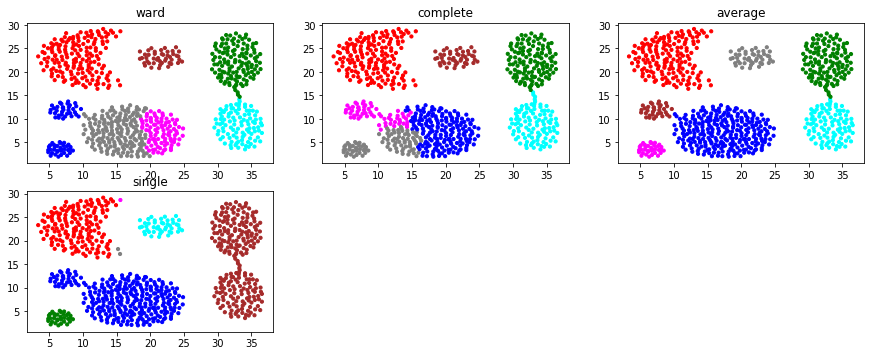

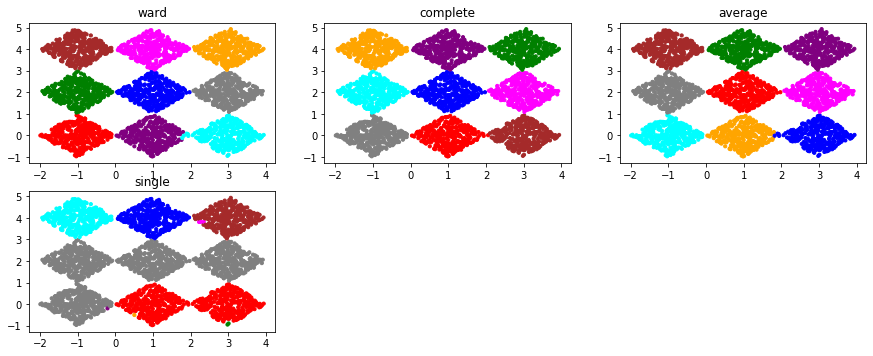

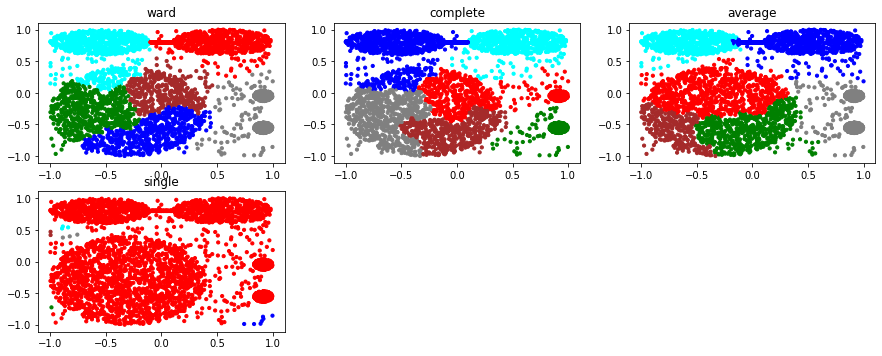

In [27]:
from scipy.io import arff

f = open('data/aggregation.arff', 'r')
data, meta = arff.loadarff(f)

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

linkages = ['ward', 'complete', 'average', 'single']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,15))

i = 1
for linkage in linkages:
    agglo = AgglomerativeClustering(n_clusters=7, linkage=linkage).fit(X)
    c_used = [colors[agglo.labels_[i]] for i in range(len(data))]

    
    plt.subplot(5, 3, i)
    plt.scatter(data['x'], data['y'], c=c_used, s=10)
    plt.title(linkage)
    i += 1
    
    

    
    
    
f = open('data/diamond9.arff', 'r')
data, meta = arff.loadarff(f)

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

linkages = ['ward', 'complete', 'average', 'single']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,15))

i = 1
for linkage in linkages:
    agglo = AgglomerativeClustering(n_clusters=9, linkage=linkage).fit(X)
    c_used = [colors[agglo.labels_[i]] for i in range(len(data))]

    
    plt.subplot(5, 3, i)
    plt.scatter(data['x'], data['y'], c=c_used, s=10)
    plt.title(linkage)
    i += 1

    

    
    
    
f = open('data/CURE.arff', 'r')
data, meta = arff.loadarff(f)

colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

linkages = ['ward', 'complete', 'average', 'single']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,15))

i = 1
for linkage in linkages:
    agglo = AgglomerativeClustering(n_clusters=6, linkage=linkage).fit(X)
    c_used = [colors[agglo.labels_[i]] for i in range(len(data))]

    
    plt.subplot(5, 3, i)
    plt.scatter(data['x'], data['y'], c=c_used, s=10)
    plt.title(linkage)
    i += 1

TODO : Calculer les scores

# Clustering DBSCAN

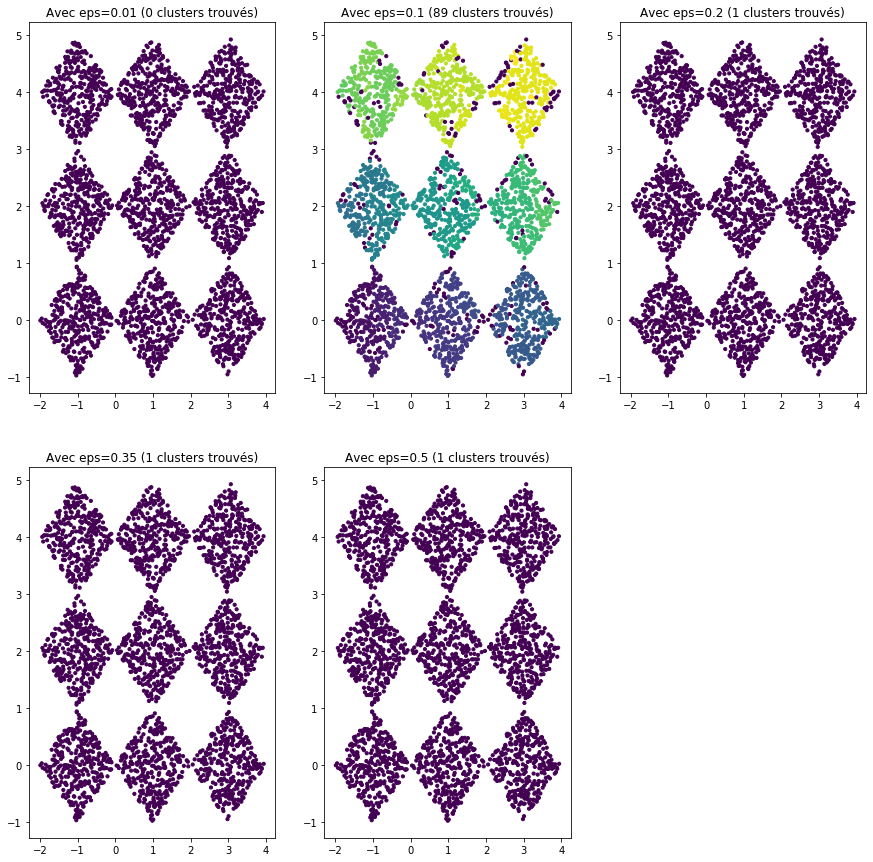

In [28]:
from scipy.io import arff
from sklearn.cluster import DBSCAN

f = open('data/diamond9.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,15))

j = 1
for eps in [0.01, 0.1, 0.2, 0.35, 0.5]:
    dbscan = DBSCAN(eps=eps).fit(X)
    
    plt.subplot(2, 3, j)
    plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
    plt.title("Avec eps=" + str(eps) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")
    j += 1

eps : 0.05 / min_s = 6 / clusters trouvés : 8
[-1 -1 -1 ... -1 -1 -1]
eps : 0.06 / min_s = 7 / clusters trouvés : 8
[-1 -1 -1 ... -1 -1 -1]
eps : 0.07 / min_s = 8 / clusters trouvés : 8
[-1 -1 -1 ... -1 -1 -1]
eps : 0.13 / min_s = 4 / clusters trouvés : 8
[0 0 0 ... 7 7 7]
eps : 0.13 / min_s = 5 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.14 / min_s = 6 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.15 / min_s = 7 / clusters trouvés : 8
[0 0 0 ... 7 7 7]
eps : 0.15 / min_s = 8 / clusters trouvés : 8
[0 0 0 ... 7 7 7]
eps : 0.15 / min_s = 9 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.15 / min_s = 10 / clusters trouvés : 10
[-1 -1  0 ...  9  9  9]


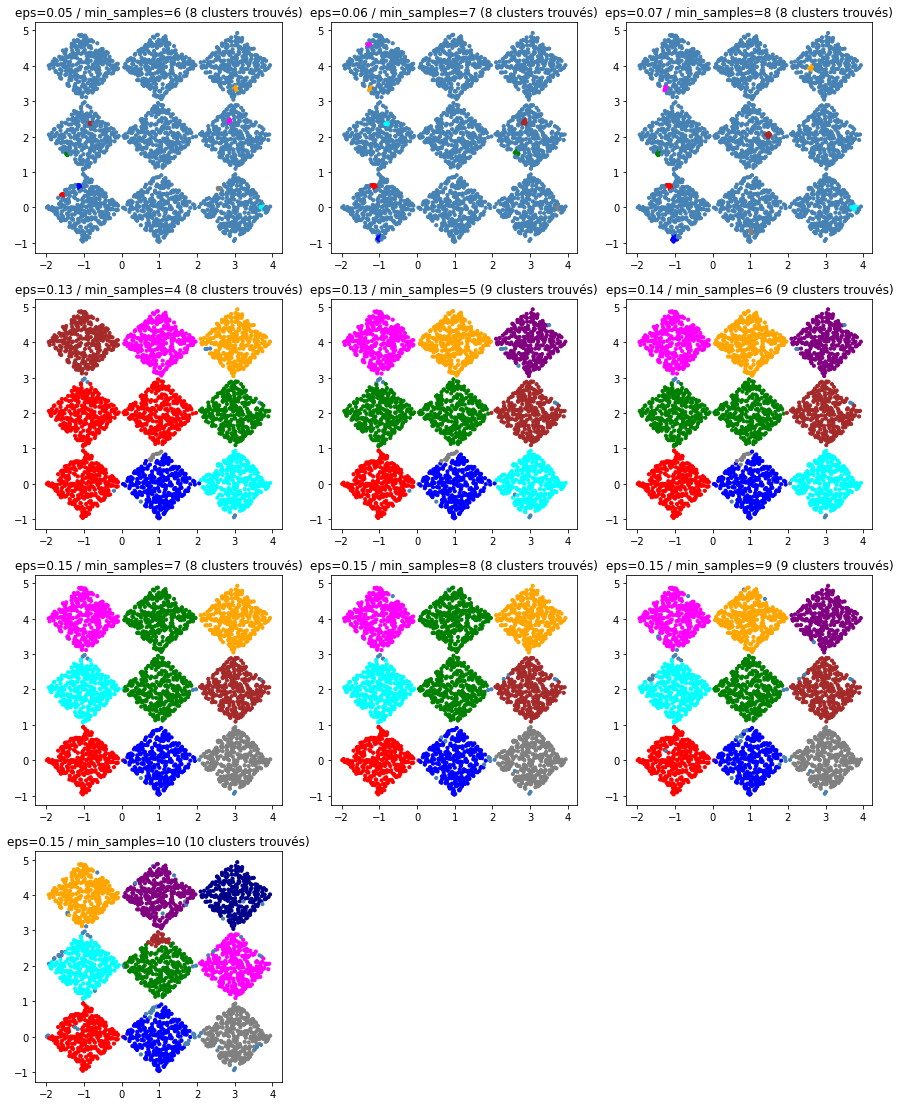

In [29]:
from scipy.io import arff
from sklearn.cluster import DBSCAN

f = open('data/diamond9.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

j = 1

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []

for eps in range(5, 16):
    eps = eps / 100
    
    for min_samples in range(2, 15):
        start_time = time.process_time()
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        times.append(time.process_time() - start_time)
        
        if max(dbscan.labels_) >= 1:
            values_silhouette.append(
                metrics.silhouette_score(X, dbscan.labels_, metric='euclidean')
            )
            values_calinski.append(
                metrics.calinski_harabasz_score(X, dbscan.labels_)
            )
            values_bouldin.append(
                metrics.davies_bouldin_score(X, dbscan.labels_)
            )
        else:
            values_silhouette.append(0)
            values_calinski.append(0)
            values_bouldin.append(0)
        
        score = max(dbscan.labels_) + 1
        
        if (score >= 8 and score <= 10):
            print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
            print(dbscan.labels_)
            plt.subplot(10, 3, j)
            #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
            c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
            plt.scatter(data['x'], data['y'], c=c_used, s=10)
            plt.title("eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")
            j += 1


ValueError: shape mismatch: objects cannot be broadcast to a single shape

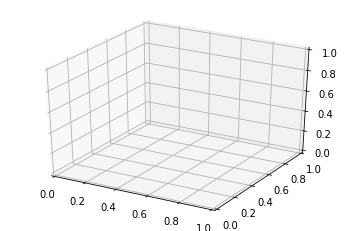

In [30]:
from mpl_toolkits import mplot3d

zline = np.linspace(0, max(values_silhouette), 1000)
xline = np.linspace(0.05, 0.16, 1000)
yline = np.linspace(1, 15, 1000)

zdata = values_silhouette
xdata = range(5, 16)
ydata = range(2, 15)

ax = plt.axes(projection='3d')
#ax.view_init(30, 45)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap="Greens")

In [31]:
from mpl_toolkits.mplot3d import Axes3D

Axes3D.plot(range(5, 16), range(2, 15), values_silhouette)

AttributeError: 'range' object has no attribute 'has_data'

On retient eps=0.15 et min_samples=9

On retrouve bien nos 9 clusters, et peu de points restent non classés

In [32]:
values_silhouette = []
values_calinski = []
values_bouldin = []

times = []

for k in range(2, 20):
    start_time = time.process_time()
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    times.append(time.process_time() - start_time)
    
    values_silhouette.append(
        metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
    )

    values_calinski.append(
        metrics.calinski_harabasz_score(X, kmeans.labels_)
    )
    values_bouldin.append(
        metrics.davies_bouldin_score(X, kmeans.labels_)
    )

eps : 0.01 / min_s = 13 / clusters trouvés : 6
eps : 0.01 / min_s = 14 / clusters trouvés : 5
eps : 0.02 / min_s = 9 / clusters trouvés : 5
eps : 0.03 / min_s = 14 / clusters trouvés : 6
eps : 0.05 / min_s = 6 / clusters trouvés : 5
eps : 0.05 / min_s = 7 / clusters trouvés : 6
eps : 0.06 / min_s = 5 / clusters trouvés : 6
eps : 0.06 / min_s = 10 / clusters trouvés : 5
eps : 0.06 / min_s = 11 / clusters trouvés : 5
eps : 0.08 / min_s = 7 / clusters trouvés : 6
eps : 0.08 / min_s = 8 / clusters trouvés : 5
eps : 0.09 / min_s = 6 / clusters trouvés : 7
eps : 0.09 / min_s = 8 / clusters trouvés : 6
eps : 0.1 / min_s = 2 / clusters trouvés : 5
eps : 0.1 / min_s = 4 / clusters trouvés : 6
eps : 0.1 / min_s = 5 / clusters trouvés : 7
eps : 0.1 / min_s = 6 / clusters trouvés : 6
eps : 0.1 / min_s = 8 / clusters trouvés : 5


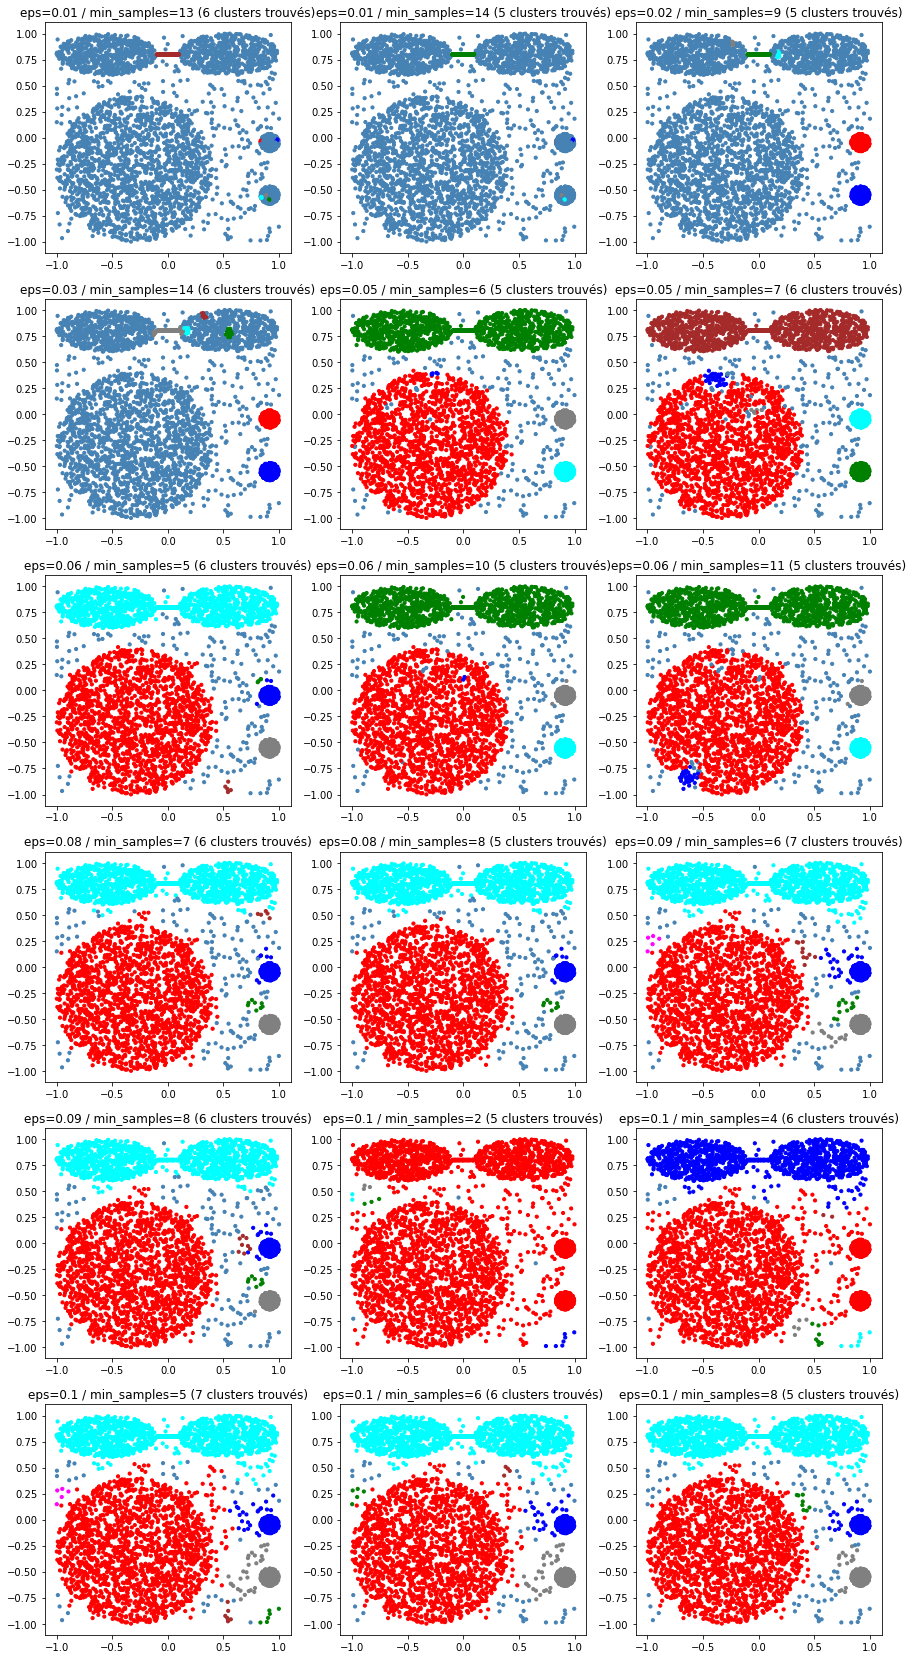

In [33]:
from scipy.io import arff
from sklearn.cluster import DBSCAN

f = open('data/CURE.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

j = 1

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []

for eps in range(1, 11):
    eps = eps / 100
    
    for min_samples in range(2, 15):
        start_time = time.process_time()
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        times.append(time.process_time() - start_time)
        
        if max(dbscan.labels_) >= 1:
            values_silhouette.append(
                metrics.silhouette_score(X, dbscan.labels_, metric='euclidean')
            )
            values_calinski.append(
                metrics.calinski_harabasz_score(X, dbscan.labels_)
            )
            values_bouldin.append(
                metrics.davies_bouldin_score(X, dbscan.labels_)
            )
        else:
            values_silhouette.append(0)
            values_calinski.append(0)
            values_bouldin.append(0)
        
        score = max(dbscan.labels_) + 1
        
        if (score >= 5 and score <= 7):
            print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
            plt.subplot(10, 3, j)
            #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
            c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
            plt.scatter(data['x'], data['y'], c=c_used, s=10)
            plt.title("eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")
            j += 1


Dire que les métriques sont pas vraiment utiles ici

A tester sur les spirales (ça marche bien 1/5)

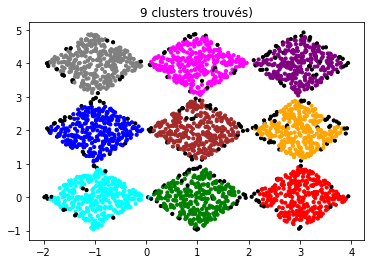

In [52]:
import hdbscan

f = open('data/diamond9.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', '#000000']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

#plt.figure(figsize=(15,50))

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []


start_time = time.process_time()
hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=10).fit_predict(X)
times.append(time.process_time() - start_time)


c_used = [colors[hdbscan_labels[i]] for i in range(len(data))]
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title(str(max(hdbscan_labels + 1)) + " clusters trouvés)")
j += 1